In [1]:
%cd ..

/Users/katyscott/Documents/BHKLab_GitHub/readii_2_roqc


In [82]:
from damply import dirs
import SimpleITK as sitk
from readii.image_processing import displayCTSegOverlay, displayImageSlice

In [80]:
image_path = dirs.PROCDATA / "TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/CT_74742304/CT.nii.gz"
mask_path = dirs.PROCDATA / "TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[GTV-1].nii.gz"

In [81]:
image = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

<Axes: >

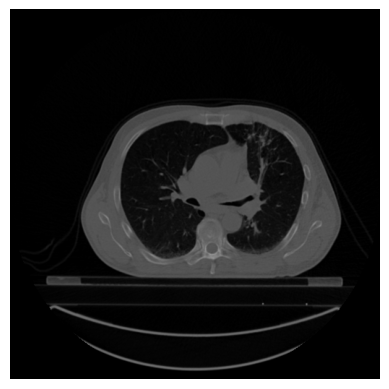

In [86]:
displayImageSlice(image,38)

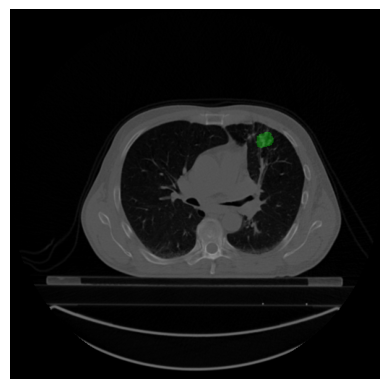

In [87]:
displayCTSegOverlay(image, mask, 38)

In [ ]:
displayCTSegOverlay(image, mask, crop=True)

# 3D Visualization

In [2]:
import pyvista as pv
from pyvista import examples
from pathlib import Path
import numpy as np

In [ ]:
mesh = examples.download_knee_full()

pl = pv.Plotter()
pl.add_volume(mesh, cmap="bone", opacity="sigmoid", show_scalar_bar=False)
pl.enable_depth_peeling()
pl.show()

In [ ]:
filename = Path('../data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[GTV-1].nii.gz')
reader = pv.get_reader(filename)
mask = reader.read()

clim = [1]
pl = pv.Plotter()
pl.add_volume(mask, cmap='cool', opacity="sigmoid", show_scalar_bar=False)
pl.enable_depth_peeling()
pl.show()


## Example heart segmentation from PyVista

https://docs.pyvista.org/examples/02-plot/volume_rendering.html#volume-with-segmentation-mask

In [ ]:
dataset = examples.download_whole_body_ct_female()
ct_image = dataset['ct']
heart_mask = dataset['segmentations']['heart']

In [ ]:
heart_array = np.full_like(ct_image.active_scalars, -1000)

ct_image_array = ct_image.active_scalars
heart_mask_array = heart_mask.active_scalars

heart_array[heart_mask_array == True] = ct_image_array[heart_mask_array == True]

ct_image['heart'] = heart_array

In [ ]:
pl = pv.Plotter()

# Add the CT image.
pl.add_volume(
    ct_image,
    scalars='NIFTI',
    cmap='bone',
    opacity='sigmoid_15',
    show_scalar_bar=False,
)

# Add masked CT image of the heart and use a contrasting color map.
_ = pl.add_volume(
    ct_image,
    scalars='heart',
    cmap='gist_heat',
    opacity='linear',
    opacity_unit_distance=np.mean(ct_image.spacing),
)

# Orient the camera to provide a latero-anterior view.
pl.view_yz()
pl.camera.azimuth = 70
pl.camera.up = (0, 0, 1)
pl.camera.zoom(1.5)
pl.show()

## Example Visualize Anatomical Groups

In [ ]:
from __future__ import annotations

import pyvista as pv
from pyvista import examples

In [ ]:
dataset = examples.download_whole_body_ct_female()

label_map = dataset['label_map']

# Get a list of all label names. This list will be filtered by group.
label_names = dataset['segmentations'].keys()

# Get color and id mappings included with the dataset. These are used to filter and
# color the contours.
names_to_colors = dataset.user_dict['names_to_colors']
names_to_ids = dataset.user_dict['names_to_ids']
ids_to_colors = dataset.user_dict['ids_to_colors']

In [ ]:
def filter_labels(label_names: list[str], search_terms: list[str]):
    def include_label(label_name: str):
        return any(target in label_name for target in search_terms)

    return [label for label in label_names if include_label(label)]


def plot_anatomy(search_terms: list[str]):
    # Get a list of labels which contain any of the listed terms.
    group_names = filter_labels(label_names, search_terms)

    # Get the label ids corresponding to the matched labels.
    group_ids = [names_to_ids[name] for name in group_names]

    # Selectively generate surfaces for the specified labels
    group_surface = dataset['label_map'].contour_labels(select_inputs=group_ids)
    print(group_surface)

    # Color the labels with the color mapping
    colored_surface = group_surface.color_labels(colors=ids_to_colors)
    print(colored_surface)

    # # Plot the label map.
    # pl = pv.Plotter()
    # pl.add_mesh(colored_surface)
    # pl.view_zx()
    # pl.camera.up = (0, 0, 1)
    # pl.show()

In [ ]:
# Define terms which describe all relevant segments.
cardio = [
    'heart',
    # 'aorta',
    # 'artery',
    # 'brachiocephalic_trunk',
    # 'vein',
    # 'atrial_appendage',
    # 'vena_cava',
]

# Plot the labels associated with these terms.
plot_anatomy(cardio)

## NSCLC-Radiomics sample

In [6]:
pat_id = "LUNG1-294_0293"

image_path = Path(f"data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/{pat_id}").rglob('CT_*/CT.nii.gz').__next__()
print(image_path)

mask_paths = [path for path in Path(f'data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/{pat_id}').rglob('GTV__*.nii.gz')]
print(mask_paths)

data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/CT_74742304/CT.nii.gz
[PosixPath('data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[GTV-1].nii.gz'), PosixPath('data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[gtv-2].nii.gz'), PosixPath('data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[gtv-6].nii.gz'), PosixPath('data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[gtv-7].nii.gz'), PosixPath('data/procdata/TCIA_NSCLC-Radiomics/images/mit_all_GTVs_NSCLC_Radiomics/LUNG1-294_0293/RTSTRUCT_02337966/GTV__[gtv-5].nii.gz')]


In [7]:
image = pv.read(image_path)
# remove bottom layer of image with table
image = image.crop(margin=(0,125,0))
image_array = image.active_scalars

masks = {str(mask_path.name).removesuffix('.nii.gz'): pv.read(mask_path).crop(margin=(0,125,0)) for mask_path in mask_paths}

In [8]:
for gtv_name, gtv_mask in masks.items():
    gtv_array = np.full_like(image_array, 0)

    gtv_mask_array = gtv_mask.active_scalars

    gtv_array[gtv_mask_array == True] = 1

    image[gtv_name] = gtv_array


In [9]:
image

ImageData (0x152a0a200)
  N Cells:      11870019
  N Points:     12072960
  X Bounds:     0.000e+00, 4.990e+02
  Y Bounds:     1.221e+02, 3.770e+02
  Z Bounds:     0.000e+00, 2.670e+02
  Dimensions:   512, 262, 90
  Spacing:      9.766e-01, 9.766e-01, 3.000e+00
  N Arrays:     6

In [12]:
pl = pv.Plotter()
pl.enable_depth_peeling(10)

# Add the base image
# pl.add_volume(
#     image,
#     scalars='NIFTI',
#     cmap='gray',
#     opacity='sigmoid_9',
#     show_scalar_bar=False,  
# )

colour_order = ['cyan', 'magenta', 'lime', 'yellow', 'red']

for (gtv_name, colour) in zip(masks.keys(), colour_order):
    _ = pl.add_volume(
            image,
            scalars = gtv_name,
            cmap=['white', colour],
            opacity='linear',
            opacity_unit_distance=np.mean(image.spacing),
            show_scalar_bar=False,
            shade = True
        )


pl.view_xz()

pl.camera.zoom(1.5)
# pl.camera.position = (0, 0, 0)
pl.camera.azimuth = 0
pl.show()


Widget(value='<iframe src="http://localhost:50347/index.html?ui=P_0x30fd83bc0_2&reconnect=auto" class="pyvista…

In [30]:
pl = pv.Plotter()
pl.enable_depth_peeling(10)

_ = pl.add_volume(
            image,
            scalars = "GTV__[gtv-5]",
            cmap=['white', 'red'],
            opacity='linear',
            opacity_unit_distance=np.mean(image.spacing),
            show_scalar_bar=False,
            shade = True
        )

pl.view_xz()
pl.camera.zoom(5)
pl.camera.azimuth = 0
pl.show()

Widget(value='<iframe src="http://localhost:50347/index.html?ui=P_0x3c3bb2900_17&reconnect=auto" class="pyvist…

In [18]:
pl.camera.zoom

<bound method Camera.zoom of Camera (0x36010ce20)
  Position:            (148.85664859790666, 357.0652169470876, 133.3202198584424)
  Focal Point:         (249.51171875, 249.51171875, 133.5)
  Parallel Projection: False
  Distance:            147.30658655556806
  Thickness:           722.655888216031
  Parallel Scale:      310.3540878102891
  Clipping Range:      (0.7233792674835146, 723.3792674835146)
  View Angle:          30.0
  Roll:                90.51991632044617>

## GIF creation

In [22]:
pl = pv.Plotter(notebook=False, off_screen=True)
pl.enable_depth_peeling(10)

# Add the base image
pl.add_volume(
    image,
    scalars='NIFTI',
    cmap='gray',
    opacity='sigmoid_9',
    show_scalar_bar=False,  
)

colour_order = ['cyan', 'magenta', 'lime', 'yellow', 'red']

for (gtv_name, colour) in zip(masks.keys(), colour_order):
    _ = pl.add_volume(
            image,
            scalars = gtv_name,
            cmap=['white', colour],
            opacity='linear',
            opacity_unit_distance=np.mean(image.spacing),
            show_scalar_bar=False,
            shade = False
        )


pl.view_xz()
pl.camera.zoom(1.5)

pl.open_gif(f'../data/results/TCIA_NSCLC-Radiomics/visualization/volumes/{pat_id}_gtv.gif')

nframe = 36
for phase in np.linspace(0, 360, nframe):
    pl.camera.azimuth = phase
    pl.write_frame()

pl.close()